# Time series forecasting

## Exchange Rate Data Set

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
e_rate = pd.read_csv("exchange-rate-twi.csv", )

In [3]:
e_rate

,Month,Exchange Rate TWI
0,1,100.0
1,2,99.6
2,3,99.4
3,4,99.1
4,5,99.2
...,...,...
299,300,49.6
300,301,48.5
301,302,48.4
302,303,51.0


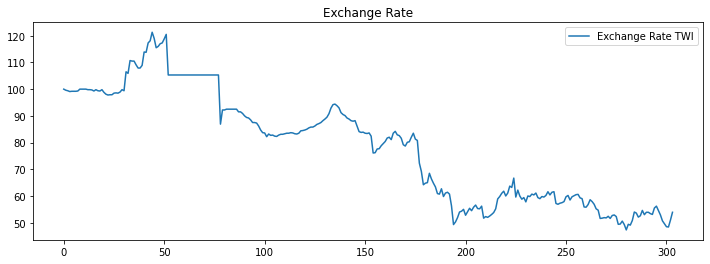

In [20]:
e_rate["Exchange Rate TWI"].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Exchange Rate')
plt.show(block=False)

In [5]:
e_rate.shape

(304, 2)

In [6]:
train_len = 212
train = e_rate[0:train_len] # first 212 months as training set
test = e_rate[train_len:] # last 92 months as out-of-time test set

In [7]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Exchange Rate TWI'][train_len-1]

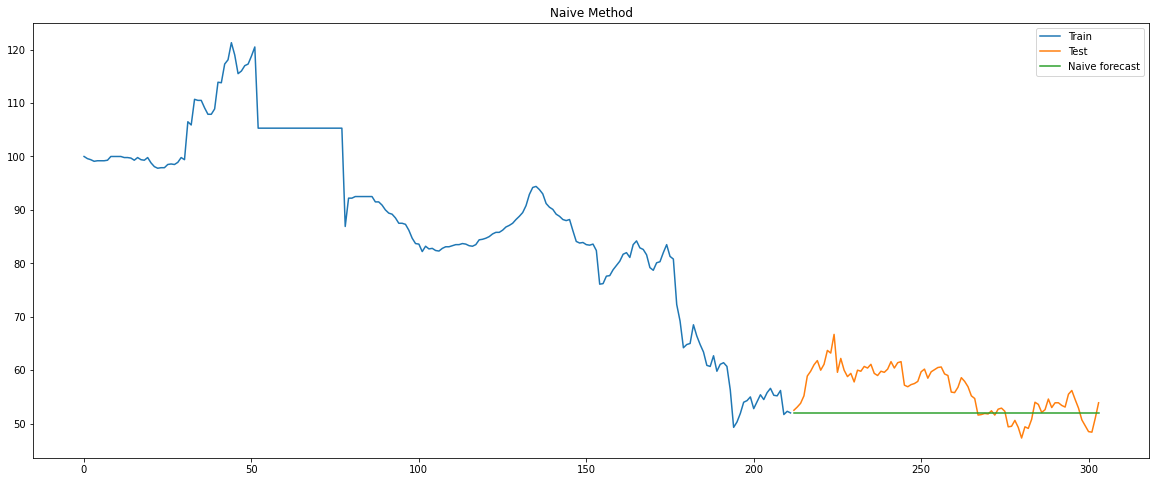

In [8]:
plt.figure(figsize=(20,8))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['naive_forecast'])/test['Exchange Rate TWI'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,5.98,8.41


In [10]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Exchange Rate TWI'].mean()

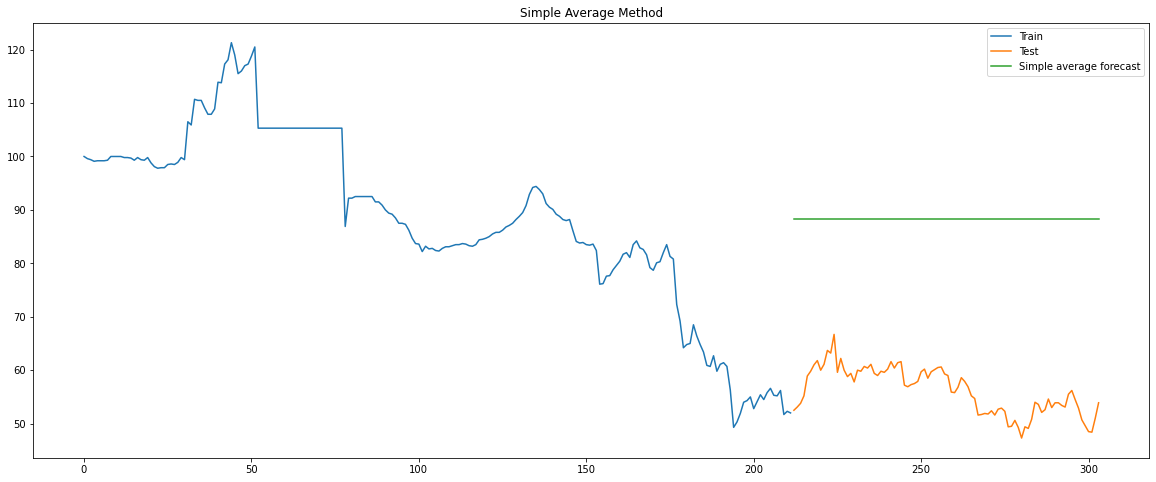

In [11]:
plt.figure(figsize=(20,8))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [12]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_avg['avg_forecast'])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,5.98,8.41
0,Simple average method,32.42,58.12


In [13]:
y_hat_sma = e_rate.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = e_rate['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

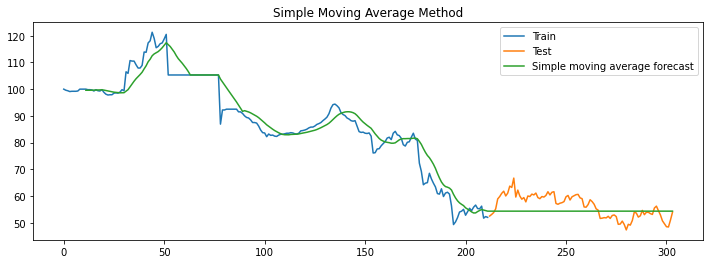

In [14]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [15]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecast'][train_len:])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast-12m'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,5.98,8.41
0,Simple average method,32.42,58.12
0,Simple moving average forecast-12m,4.66,6.96


In [16]:
y_hat_sma = e_rate.copy()
ma_window = 6
y_hat_sma['sma_forecast'] = e_rate['Exchange Rate TWI'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

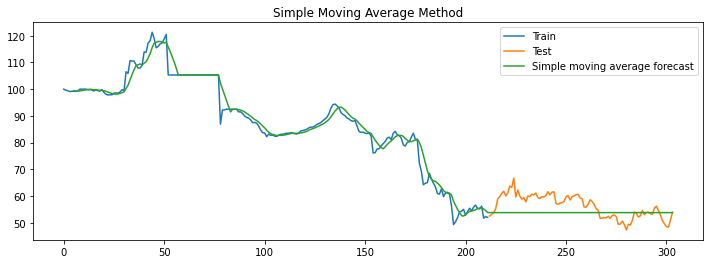

In [17]:
plt.figure(figsize=(12,4))
plt.plot(train['Exchange Rate TWI'], label='Train')
plt.plot(test['Exchange Rate TWI'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [18]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecast'][train_len:])/test['Exchange Rate TWI'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast-6m'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,5.98,8.41
0,Simple average method,32.42,58.12
0,Simple moving average forecast-12m,4.66,6.96
0,Simple moving average forecast-6m,4.90,7.13


## KPSS and ADF Tests

# ADF Tests:

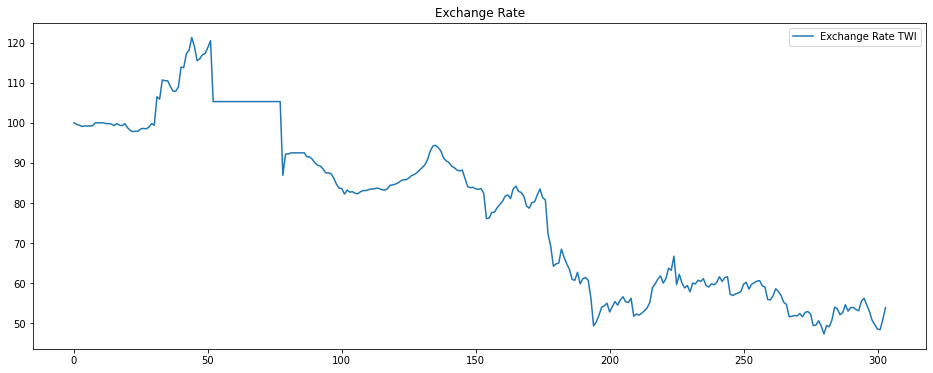

In [24]:
e_rate["Exchange Rate TWI"].plot(figsize=(16, 6))
plt.legend(loc='best')
plt.title('Exchange Rate')
plt.show(block=False)

In [25]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(e_rate["Exchange Rate TWI"])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -0.805468
Critical Values @ 0.05: -2.87
p-value: 0.817511


In [28]:
adf_test

(-0.805467872054155,
 0.8175106426685046,
 0,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1268.8696918056114)

In [26]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(e_rate["Exchange Rate TWI"])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.725897
Critical Values @ 0.05: 0.46
p-value: 0.010000


C:\Users\Nikki\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [27]:
kpss_test

(1.7258967599333663,
 0.01,
 16,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [ ]:
temp = pd.read_csv("Daily+temperature+data.csv")

In [ ]:
temp

In [ ]:
temp.columns = ['Date', 'Min_temp']

In [ ]:
temp.head()

In [ ]:
train_len = 511
train = temp[0:train_len] 
test = temp[train_len:]

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train["Min_temp"])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(48)

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train['Min_temp'], label='Train')
plt.plot(test['Min_temp'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Min_temp']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.5, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( train['Min_temp'], label='Train')
plt.plot(test['Min_temp'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [ ]:
rmse = np.sqrt(mean_squared_error(test['Min_temp'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Min_temp']-y_hat_holt['holt_forecast'])/test['Min_temp'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Min_temp']) ,seasonal_periods=30 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(60)